<div class="alert alert-block alert-info">
    
### Numeric Scaling 

#### Min-Max Scaling 

Min-Max scaling works by rescaling our data such that all values are within a given range, usually 0 to 1. 

The formula is as follows: 

$$X_{scaled} = \frac{X - X_{min}}{X_{max}-X_{min}}$$ 

#### Standardization 

Standardization works by rescaling our data such that the mean of the data is 0 and the standard deviation is 1. 

The formula is as follows: 

$$X_{scaled} = \frac{X - \mu}{\sigma} $$ 

##### Note 

- Min-Max Scaling is sensitive to outliers as it is based on the range of values. 
- Standardization is not affected by outliers as it is based on the mean and standard deviation of the data. 

</div>
## Feature Selection 

Feature selection is the process of selecting a subset of the most relevant features to use in the building of a machine learning model. This can be done in both a supervised and unsupervised way. 

<div class="alert alert

[Course Content](https://ds.codeup.com/regression/split-and-scale/)

**Objective:** Transform data to produce values that:

- have a desired range
- follow a desired distribution


**Purpose:** Appropriately scaled data enhances the performance of various machine learning algorithms. 

<div class="alert alert-block alert-success">
    
### Why scale data?


Scaling data addresses issues associated with varying magnitudes across features.

Differences in magnitude can affect the performance of the underlying algorithms used to train a model. 

   - E.g. A single feature dominates and other features are not given influence
    

If values are of a comparable scale, computation is simplified and the model may have better performance. 


<div class="alert alert-block alert-info">
    
### Which machine learning algorithms should use scaled features?

Certain ML algorithms either require that data be of comparable scale or perform better when it is.

- Distance-based calculations (e.g. KNN or SVM)
- Linear and logistic regression 
- Dimensional reduction (e.g. Principal Components Analysis)
- Neural networks

Collectively, this is implemented using the `sklearn preprocessing` [package](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler).


<div class="alert alert-block alert-success">

### Terminology 



**Scale**

  - Adjusts the range of values
  - Preserves distribution of the values

**Standardize**

  - Adjusts values to have a standard deviation of 1 and mean of 0.
   
**Normalize**

  - Is often used to refer to scaling and standardization
  
  
  - Important: May refer to transforming to the **unit norm** with [normalize.](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html)

    - Applied to an entire row of values
    - The sum of the squares of the values is equal to 0
      
    
  

<div class="alert alert-block alert-info">

### Scaling within the Pipeline


**Data preparation:**

- Transforming data using scaling, standardization, or normalization is conducted during the preparation of the data. 


- Exploration should be performed with unaltered data. 


- Statistical tests can generally be performed with unaltered data.


- Scaling should be applied post-splitting


- Units of measurement should be interpreted with unaltered data.


**Recommendations:**

- Retain both the altered and unaltered data for use throughout your work. 


- Create functions which will take data and perform a transformation for use in data preparation. 


<div class="alert alert-block alert-success">
    
### How are features scaled?

Computing and applying various statistics from the data set:
    
   - minimum
   - maximum
   - range 
   - mean
   - quantiles
   - standard deviation
    
**Note:** If these values are not known, scaling may not be useful. 


Features are scaled *independently*. Create and apply a scaler for separate features.

<div class="alert alert-block alert-info">

### Demonstrating the scaling process


    1. Generate random data with numpy
    2. Visualize the data
    3. Split the data
    4. Apply a scaling function
    5. Visualize the transformed data


In [1]:
#### Libraries 

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd

np.random.seed(123)

<div class="alert alert-block alert-success">
    
### Demonstration of MinMax Scaler

---

### 1. Generate and plot data

Here is a histogram of the dataset we will be working with.


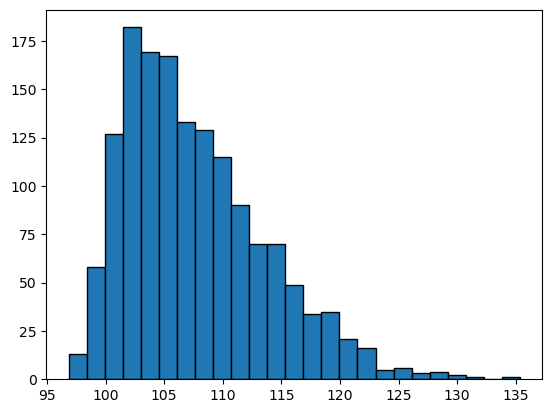

In [2]:
x = stats.skewnorm(7).rvs(1500) * 10 + 100
x = x.reshape(-1, 1)

plt.hist(x, bins = 25, ec = 'black')
print('Here is a histogram of the dataset we will be working with.')

### 2. Split the dataset into train, test, and validate


In [3]:
x_train_and_validate, x_test = train_test_split(x, random_state=123)

x_train, x_validate = train_test_split(x_train_and_validate)

### 3. Create a MinMaxScaler object and apply it to the data

In [4]:
scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(x_train)


### Apply to train, validate, and test
x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)


### 4. Visualize the data

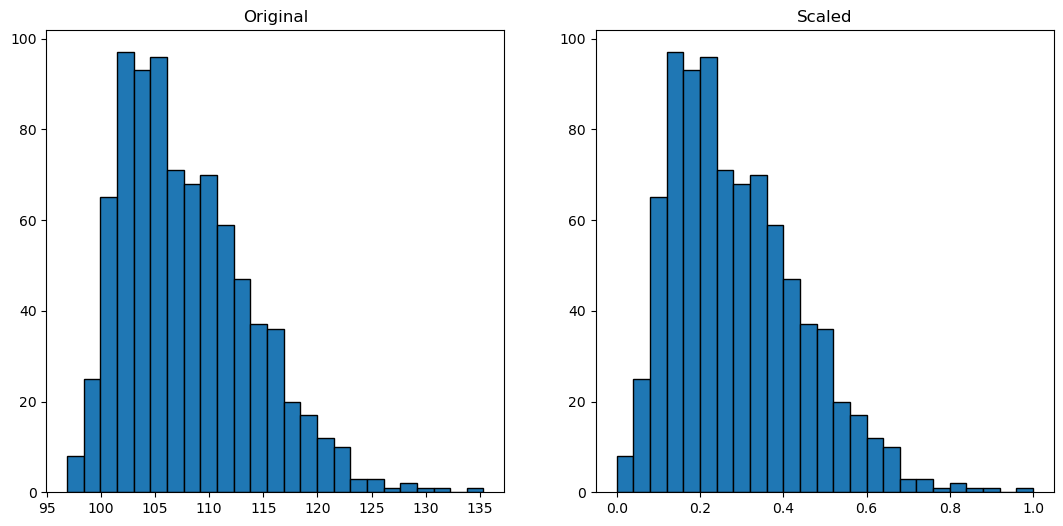

In [5]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')
plt.show()

### Fitting and transforming

`fit`  Produces the parameters needed to perform the transformation

   - Conducted using the training portion of the dataset 
    
`transform` Applies the scaling to the dataset

### Linear versus Non-linear

**Linear:** Preserves underlying distribution
     

**Non-linear:** Alters distribution of data

---
<div class="alert alert-block alert-success">

### SciKit Learn Transformation Methods

#### `MinMaxScaler`

[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

- Scales features to produce a desired range
- Range can be specified in the function 



$$ x' = \dfrac{x - min(x)}{max(x) - min(x)}$$

#### `StandardScaler`

[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

- Scales features to produce a desired distribution 
- Makes the standard deviation to 1
- Centers the values aronud a mean of 0


$$x' =  \dfrac{x - \bar{x}}{\sigma_{x}}$$

#### `RobustScaler`

[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)

- Scales features using the IQR 
- Reduces impact of outliers

$$x' =  \dfrac{x - med(x)}{IQR_{x}}$$

#### `QuantileTransformer`

[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html)
- Uses a data set's quantile values 
- Reduces impact of outliers


### Demonstration of Standard Scaler

In [ ]:
scaler = sklearn.preprocessing.StandardScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')
plt.show()

### Demonstration of Robust Scaler

In [ ]:
scaler = sklearn.preprocessing.RobustScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')
plt.show()

### Exercise Set


Notebook: `scaling.ipynb`


- Apply various transformations to data you have prepared
- Observe the differences in the transformed data
- Create preparation functions to transform data